<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/Regressi%C3%B3nLineal_Modulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tarea de Regresión Lineal

In [ ]:
# Librerias basicos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connectar al GDRIVE

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Preparación de datos de la Casen

In [ ]:
dtafile = '/content/drive/MyDrive/Modulo5/Casen en Pandemia 2020 STATA.dta'

df = pd.read_stata(dtafile)
df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/io/stata.py:1434: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,folio,o,id_persona,id_vivienda,region,provincia,comuna,zona,area,segmento,estrato,cod_upm,hogar,p6_p_con,expr,expp,expc,varstrat,varunit,fecha_entrev,metodologia_entrev,tot_hog,numviv,informante_idoneo,tel1,tel2,tel3,tel4,tel5,tel6,tel7,tel8,p0a,p0b,p1,p2,p3,p4,p5,p6,...,r2_c_cod,r2_pais_esp,r2_p_cod,r3,r8a,r8b,r8c,r8d,r8e,r8f,r8g,r8h,inmigrante,etnia,v1,v1_casa,v1_depto,v13,v13_propia,v13_arrendada,v13_cedida,v19_preg,v19,v20,v20_esp,v20_red,v22,v23,v23_sistema,v23_cajon,v27,v28,v29,hacinamiento,nhog_viv,indsan,ten_viv,ten_viv_f,iae,iai
185432,1.630530e+12,1,494,1.630530e+10,Región de Ñuble,Punilla,San Nicolás,Rural,Rural,163053003,163052,1.630590e+10,1,Casa aislada (no pareada),78,80,59,588,1494,2021-01-06,Teléfonica,1,4,Sí,Contesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Sí,48,Jefe(a) de Hogar,4,...,NaN,,NaN,No pertenece a ninguno de estos pueblos indígenas,Sí,Sí,Sí,No,Sí,No,Sí,No,No sabe,No pertenece a ninguno pueblo indígena,Casa,Casa aislada (no pareada),NaN,Propia,Propia pagada,NaN,NaN,No sabe,NaN,Pozo o noria,,NaN,NaN,Sí,W.C. conectado al alcantarillado,NaN,3,NaN,NaN,"Sin hacinamiento (menos de 2,5 personas por do...",1,NaN,Propia,Tenencia formal,Sin allegamiento externo,con allegamiento interno
185433,1.630530e+12,2,495,1.630530e+10,Región de Ñuble,Punilla,San Nicolás,Rural,Rural,163053003,163052,1.630590e+10,1,Casa aislada (no pareada),78,80,59,588,1494,2021-01-06,Teléfonica,1,4,No,Contesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Sí,48,Jefe(a) de Hogar,4,...,NaN,,NaN,No pertenece a ninguno de estos pueblos indígenas,Sí,Sí,Sí,No,Sí,No,Sí,No,No sabe,No pertenece a ninguno pueblo indígena,Casa,Casa aislada (no pareada),NaN,Propia,Propia pagada,NaN,NaN,No sabe,NaN,Pozo o noria,,NaN,NaN,Sí,W.C. conectado al alcantarillado,NaN,3,NaN,NaN,"Sin hacinamiento (menos de 2,5 personas por do...",1,NaN,Propia,Tenencia formal,Sin allegamiento externo,con allegamiento interno
185434,1.630530e+12,3,98,1.630530e+10,Región de Ñuble,Punilla,San Nicolás,Rural,Rural,163053003,163052,1.630590e+10,1,Casa aislada (no pareada),78,80,59,588,1494,2020-12-22,Teléfonica,1,3,No,Contesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Sí,71,Jefe(a) de Hogar,3,...,Chillán,,NaN,No pertenece a ninguno de estos pueblos indígenas,No,No,No,No,NaN,NaN,NaN,NaN,No inmigrante,No pertenece a ninguno pueblo indígena,Casa,Casa aislada (no pareada),NaN,Propia,Propia pagada,NaN,NaN,No sabe,NaN,Pozo o noria,,NaN,NaN,No,NaN,NaN,2,NaN,NaN,"Sin hacinamiento (menos de 2,5 personas por do...",1,Deficitario,Propia,Tenencia formal,Sin allegamiento externo,sin allegamiento interno
185435,1.630530e+12,1,96,1.630530e+10,Región de Ñuble,Punilla,San Nicolás,Rural,Rural,163053003,163052,1.630590e+10,1,Casa aislada (no pareada),78,80,59,588,1494,2020-12-22,Teléfonica,1,3,Sí,Contesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Sí,71,Jefe(a) de Hogar,3,...,Chillán,,NaN,No pertenece a ninguno de estos pueblos indígenas,No,No,No,No,NaN,NaN,NaN,NaN,No inmigrante,No pertenece a ninguno pueblo indígena,Casa,Casa aislada (no pareada),NaN,Propia,Propia pagada,NaN,NaN,No sabe,NaN,Pozo o noria,,NaN,NaN,No,NaN,NaN,2,NaN,NaN,"Sin hacinamiento (menos de 2,5 personas por do...",1,Deficitario,Propia,Tenencia formal,Sin allegamiento externo,sin allegamiento interno
185436,1.630530e+12,2,97,1.630530e+10,Región de Ñuble,Punilla,San Nicolás,Rural,Rural,163053003,163052,1.630590e+10,1,Casa aislada (no pareada),78,80,59,588,1494,2020-12-22,Teléfonica,1,3,No,Contesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Sí,71,Jefe(a) de Hogar,3,...,Chillán,,NaN,No pertenece a ninguno de estos pueblos indígenas,No,No,No,No,NaN,NaN,NaN,NaN,No inmigrante,No pertenece a ninguno pueblo indígena,Casa,Casa aislada (no pareada),NaN,Propia,Propia pagada,NaN,NaN,No sabe,NaN,Pozo o noria,,NaN,NaN,No,NaN,NaN,2,NaN,NaN,"Sin hacinamiento (menos de 2,5 personas por do...",1,Deficitario,Propia,Tenencia formal,Sin allegamiento externo,sin allegamiento interno


Se va a investigar el impacto de variables del Módulo Vivienda en Sueldo. 

In [ ]:
df['y1_preg'].value_counts()

Sí                   40418
No sabe               5224
No recibió sueldo     3512
Name: y1_preg, dtype: int64

In [ ]:
df['y1'].isna().sum()

145019

In [ ]:
# Crear nueva base de datos con variables independientes y variable dependiente. 

data = df[['y1', 'region', 'comuna', 'zona', 'area', 
    'edad', 'sexo', 'v1', 'v13', 'v19_preg', 'v19', 'v20', 'v20_esp', 'v22', 'v23',
    'v23_sistema', 'v27', 'v29']]

In [ ]:
# Guardar este base de datos en el drive para no tener que cargar la base de la CASEN cada vez. 

data.to_csv('/content/drive/My Drive/Modulo5/data_Casen.csv')

In [ ]:
# Cargar base de datos 

data = pd.read_csv("/content/drive/MyDrive/Modulo5/data_Casen.csv")

In [ ]:
# hacer copia

data_copy = data

In [ ]:
data.head()

,Unnamed: 0,y1,region,comuna,zona,area,edad,sexo,s2,s13,s15,s16,s17,s18,s18_esp,s28,s28_esp,s29,s30,s30_esp
0,0,NaN,Región de Tarapacá,Iquique,Urbano,Urbano,34,Mujer,NaN,ISAPRE,No,Sí,No,No lo consideró necesario y tomó remedios caseros,NaN,No ha estado en tratamiento por ninguna condic...,NaN,NaN,NaN,NaN
1,1,NaN,Región de Tarapacá,Iquique,Urbano,Urbano,4,Mujer,No sabe,ISAPRE,NaN,No,NaN,NaN,NaN,Otra condición de salud. Especifique,ESTÉTICA,NaN,NaN,NaN
2,2,NaN,Región de Tarapacá,Iquique,Urbano,Urbano,5,Mujer,Normal,Ninguno (particular),NaN,No,NaN,NaN,NaN,No ha estado en tratamiento por ninguna condic...,NaN,NaN,NaN,NaN
3,3,372000.0,Región de Tarapacá,Iquique,Urbano,Urbano,45,Hombre,NaN,Sistema Público FONASA,No,No,NaN,NaN,NaN,No ha estado en tratamiento por ninguna condic...,NaN,NaN,NaN,NaN
4,4,NaN,Región de Tarapacá,Iquique,Urbano,Urbano,19,Mujer,NaN,Ninguno (particular),NaN,No,NaN,NaN,NaN,No ha estado en tratamiento por ninguna condic...,NaN,NaN,NaN,NaN


## Análisis exploratorio de datos (EDA) y prepocesamiento de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185437 entries, 0 to 185436
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   185437 non-null  int64  
 1   y1           40418 non-null   float64
 2   region       185437 non-null  object 
 3   comuna       185437 non-null  object 
 4   zona         185437 non-null  object 
 5   area         185437 non-null  object 
 6   edad         185437 non-null  int64  
 7   sexo         185437 non-null  object 
 8   v1           185437 non-null  object 
 9   v13          185437 non-null  object 
 10  v19_preg     185437 non-null  object 
 11  v19          140657 non-null  float64
 12  v20          185437 non-null  object 
 13  v20_esp      1790 non-null    object 
 14  v22          169363 non-null  object 
 15  v23          185437 non-null  object 
 16  v23_sistema  181725 non-null  object 
 17  v27          185437 non-null  object 
 18  v29          5387 non-nu

### Variable dependiente

In [ ]:
# y1 - es la varaible dependiente y expone sueldo

data['y1'].isna().sum()

145019

In [ ]:
# remover NA en Y1
data = data[data.y1.notnull()]

In [ ]:
# remover punto decimal

data['y1'] = data['y1'].astype(int)

In [ ]:
data['y1']

3          372000
5         3000000
11         320000
13         460000
15         240000
           ...   
185361     420000
185380     750000
185385     350000
185397     250000
185422     200000
Name: y1, Length: 40418, dtype: int64

### Variables independientes

Las variables del Módulo Vivienda de la Casen mas variables sociodemograficos (sexo, edad, region) se usaran como variables independientes. 

In [ ]:
# Region

Text(0.5, 0, 'Region')

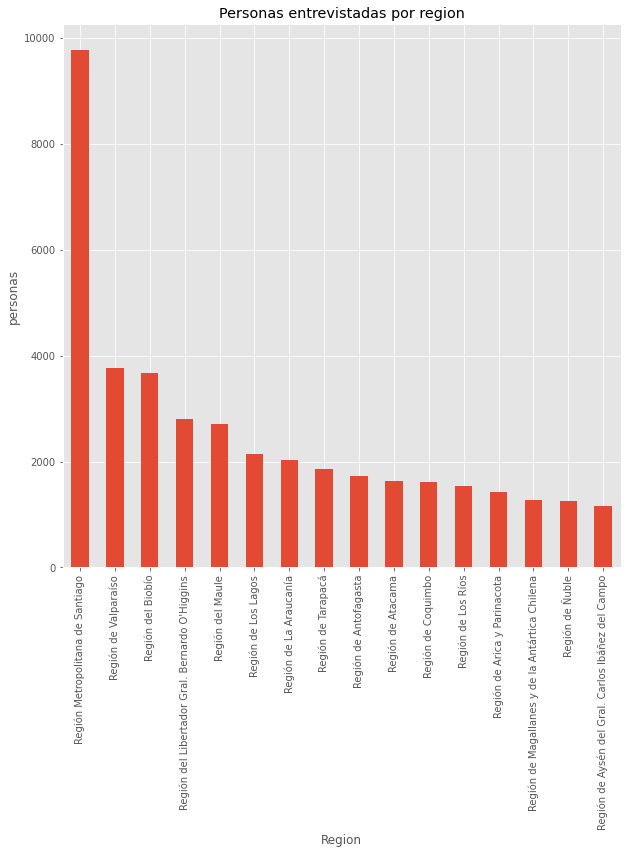

In [ ]:
data['region'].value_counts().plot.bar()
plt.title("Personas entrevistadas por region")
plt.ylabel('personas')
plt.xlabel('Region')

# Las tres regiones mas pobladas son la Metropolitana, Valparaiso, Y BioBio

Urbano    35164
Rural      5254
Name: zona, dtype: int64


Text(0.5, 0, 'Zona')

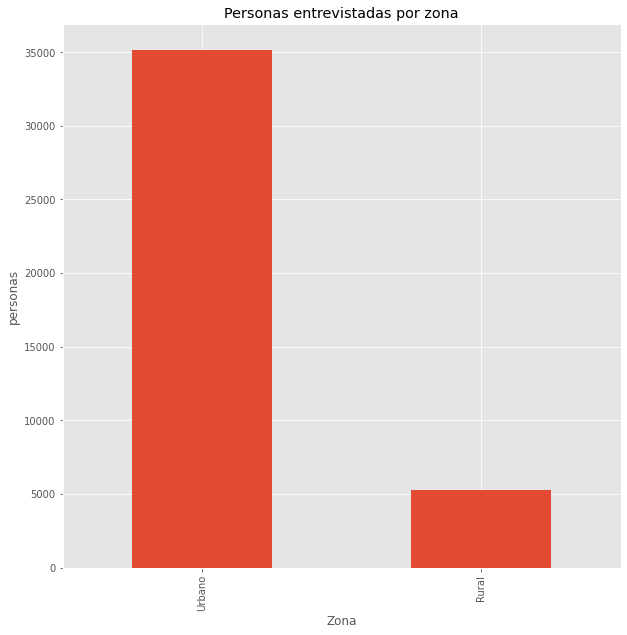

In [ ]:
print(data['zona'].value_counts())
data['zona'].value_counts().plot.bar()
plt.title("Personas entrevistadas por zona")
plt.ylabel('personas')
plt.xlabel('Zona')

# 87% de los respondientes son de zonas urbanas

Urbano    33215
Rural      5254
RAU        1949
Name: area, dtype: int64


Text(0.5, 0, 'Area')

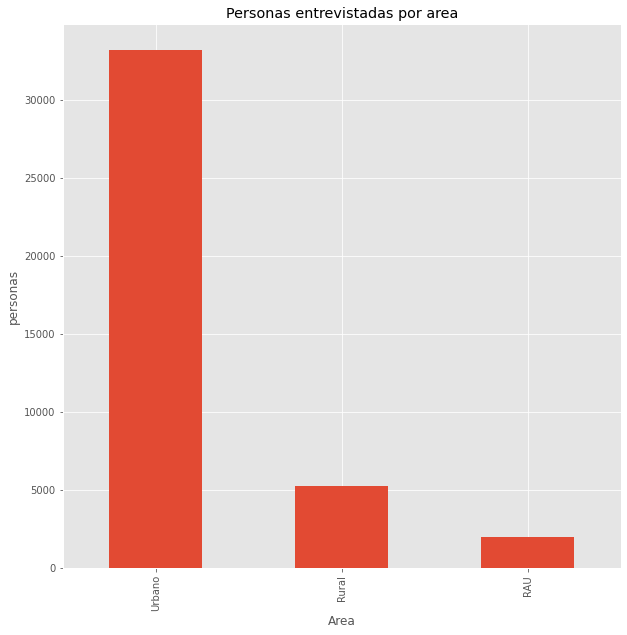

In [ ]:
print(data['area'].value_counts())
data['area'].value_counts().plot.bar()
plt.title("Personas entrevistadas por area")
plt.ylabel('personas')
plt.xlabel('Area')

# 82% son de areas urbanos. 

In [ ]:
# Area y Zona proveen la misma informacion. Area proporciona mas informacion con 
# RAU dando una tapa de informacion que no esta presente en Zona. Por tanto, se va a usar Area y botar Zona de la base de datos. 

count   40418
mean       42
std        13
min        16
25%        32
50%        42
75%        53
max        99
Name: edad, dtype: float64


Text(0.5, 0, 'Edad')

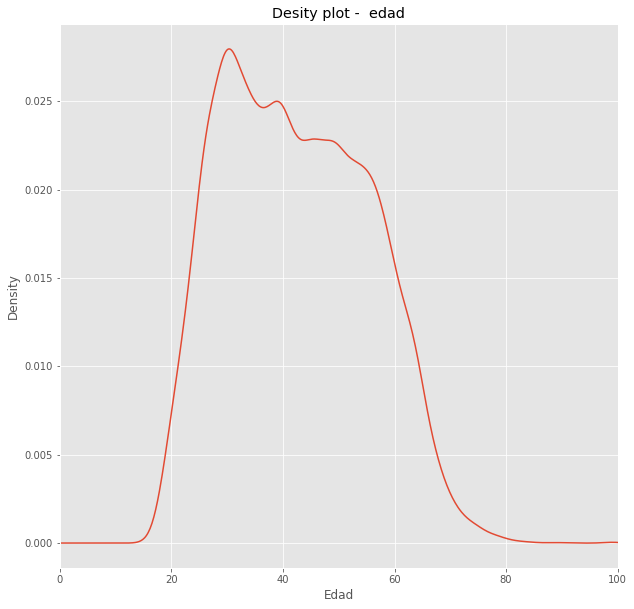

In [ ]:
print(data['edad'].describe())
data['edad'].plot.density()
plt.xlim(0,100)
plt.title("Desity plot -  edad")
plt.ylabel('Density')
plt.xlabel('Edad')

# media y mediana son 42 anos
# min es 16 anos. 

Text(0.5, 0, 'Edad')

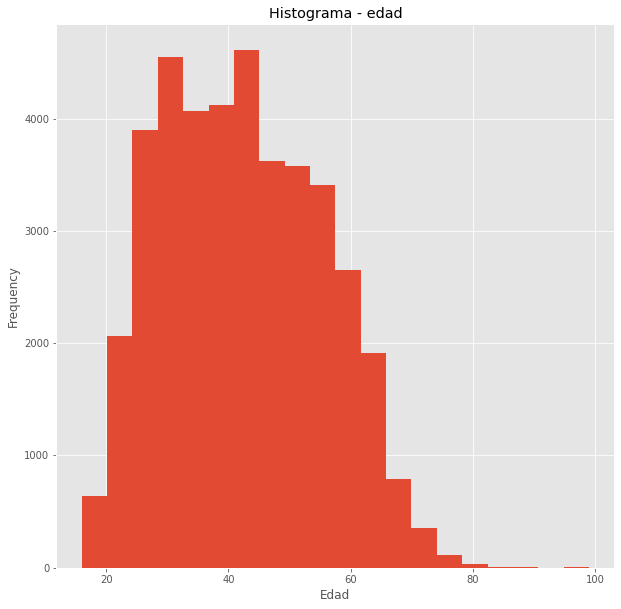

In [ ]:
data['edad'].plot.hist(bins = 20)
plt.title("Histograma - edad")
plt.ylabel('Frequency')
plt.xlabel('Edad')

Text(0.5, 0, '')

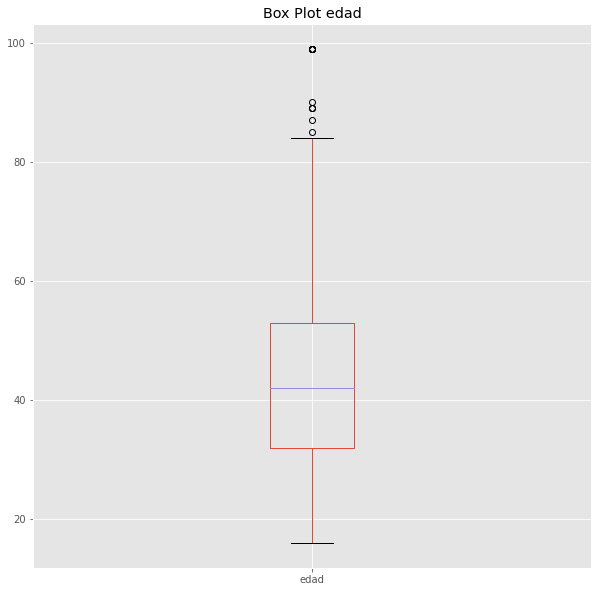

In [ ]:
data['edad'].plot.box()
plt.title("Box Plot edad")
plt.ylabel('')
plt.xlabel('')

Hombre    21529
Mujer     18889
Name: sexo, dtype: int64


Text(0.5, 0, 'sexo')

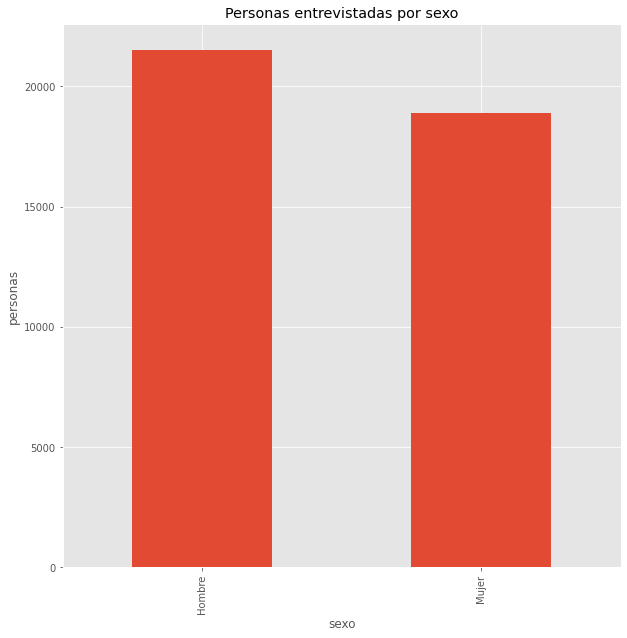

In [ ]:
print(data['sexo'].value_counts())
data['sexo'].value_counts().plot.bar()
plt.title("Personas entrevistadas por sexo")
plt.ylabel('personas')
plt.xlabel('sexo')

# Hombres representan 53%. 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40418 entries, 3 to 185422
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   40418 non-null  int64  
 1   y1           40418 non-null  int64  
 2   region       40418 non-null  object 
 3   comuna       40418 non-null  object 
 4   zona         40418 non-null  object 
 5   area         40418 non-null  object 
 6   edad         40418 non-null  int64  
 7   sexo         40418 non-null  object 
 8   v1           40418 non-null  object 
 9   v13          40418 non-null  object 
 10  v19_preg     40418 non-null  object 
 11  v19          33547 non-null  float64
 12  v20          40418 non-null  object 
 13  v20_esp      356 non-null    object 
 14  v22          37789 non-null  object 
 15  v23          40418 non-null  object 
 16  v23_sistema  39820 non-null  object 
 17  v27          40418 non-null  object 
 18  v29          1167 non-null   object 
dtypes: 

**v1 - Cual es el tipo de vicienda en el que usted reside?**



In [ ]:
data['v1'].isna().sum() # no hay valores faltantes. 

0

Casa                                                                               32519
Departamento                                                                        6407
Pieza en casa antigua, en conventillo, en galpón o espacio subdividido               728
Mediagua, mejora o vivienda de emergencia                                            635
Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)       89
Vivienda tradicional indígena                                                         20
Rancho o choza                                                                        20
Name: v1, dtype: int64


Text(0.5, 0, 'v1')

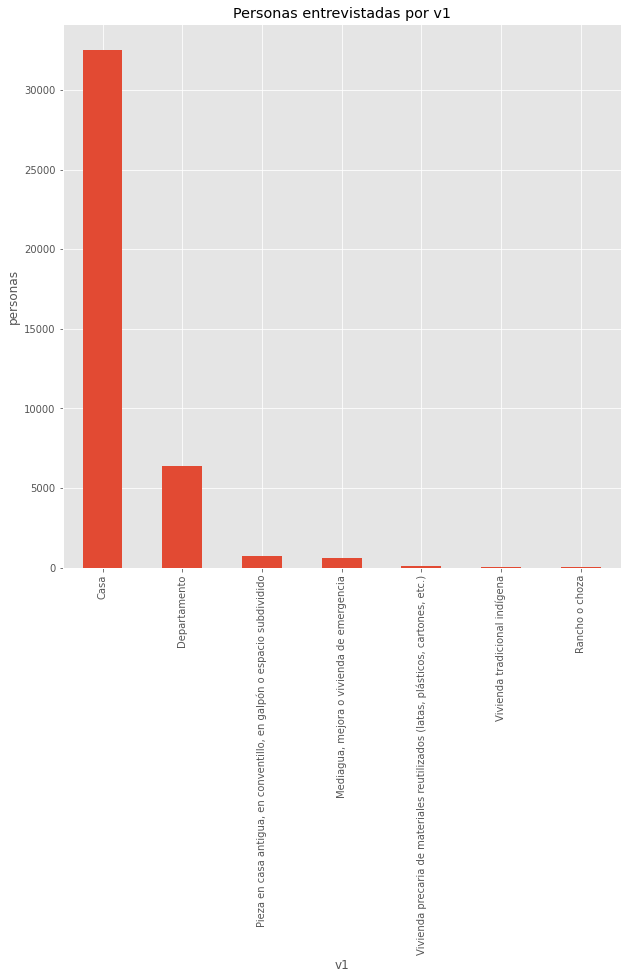

In [ ]:
print(data['v1'].value_counts())

data['v1'].value_counts().plot.bar()
plt.title("Personas entrevistadas por v1")
plt.ylabel('personas')
plt.xlabel('v1')
# casa es el tipo de vivienda mas popular (80%)

**v13 - bajo que situación ocupa la vivienda?**

In [ ]:
data['v13'].isna().sum() # no hay valores faltantes

0

Propia                            24103
Arrendada                         10594
Cedida                             4441
Usufructo (sólo uso y goce)         960
Ocupación irregular (de hecho)      223
Poseedor irregular                   97
Name: v13, dtype: int64


Text(0.5, 0, 'v13')

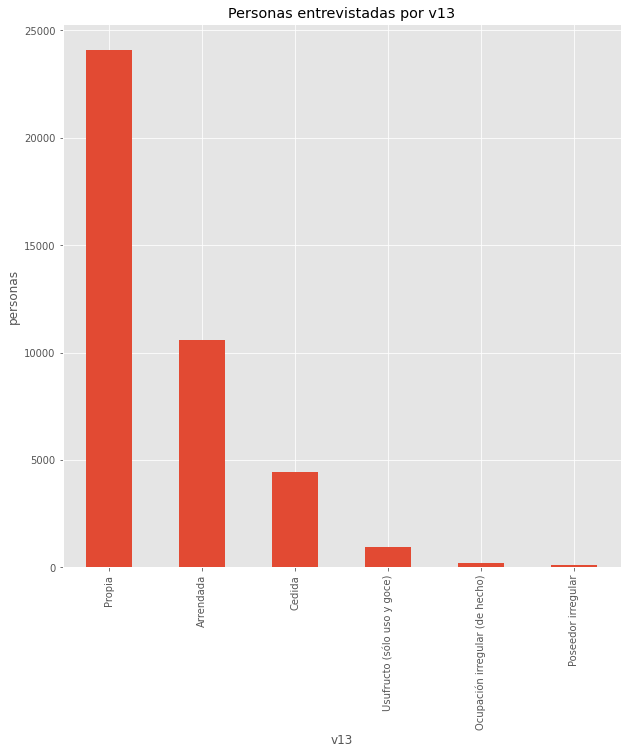

In [ ]:
print(data['v13'].value_counts())

data['v13'].value_counts().plot.bar()
plt.title("Personas entrevistadas por v13")
plt.ylabel('personas')
plt.xlabel('v13')

# 60% tienen su propia casa / 26% arriendan. 

**v19 - Cuanto se paga de arriendo en este sector?**

In [ ]:
data['v19_preg'].value_counts()

# 33.547 sabe la respuesta a esta pregunta mientras 6.871 no saben

Sí         33547
No sabe     6871
Name: v19_preg, dtype: int64

In [ ]:
data['v19_preg'].isna().sum()

0

In [ ]:
data[data.v19.isna()].comuna.value_counts()

Arica                   264
Copiapó                 154
Iquique                 138
Antofagasta             136
Punta Arenas            133
                       ... 
Curaco de Vélez           1
San Juan de la Costa      1
Putre                     1
Chile Chico               1
Ránquil                   1
Name: comuna, Length: 324, dtype: int64

In [ ]:
# remplazar las 6871 observaciones que no saben cuanto se paga en arriendo con el promedio pagado en arriendo para observaciones de la misma comuna. 

data['v19'] = data['v19'].fillna(data.groupby("comuna")['v19'].transform('mean'))

In [ ]:
data['v19'].isna().sum()

0

In [ ]:
# convertir v19 a int

data['v19']=data['v19'].astype(int)

count     40418
mean     305053
std      200821
min           1
25%      200000
50%      265822
75%      350000
max     8000000
Name: v19, dtype: float64


Text(0.5, 0, 'v19')

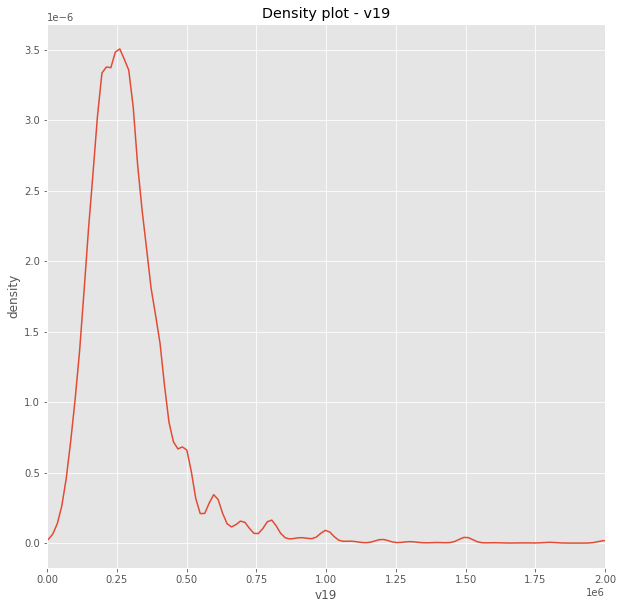

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
print(data['v19'].describe())
data['v19'].plot.density()
plt.xlim(0,2000000)
plt.title("Density plot - v19")
plt.ylabel('density')
plt.xlabel('v19')

# El promedio es $305.053
# La mediana es 265.822
# Max valor en arriendo es $8.000.000

Text(0.5, 0, '')

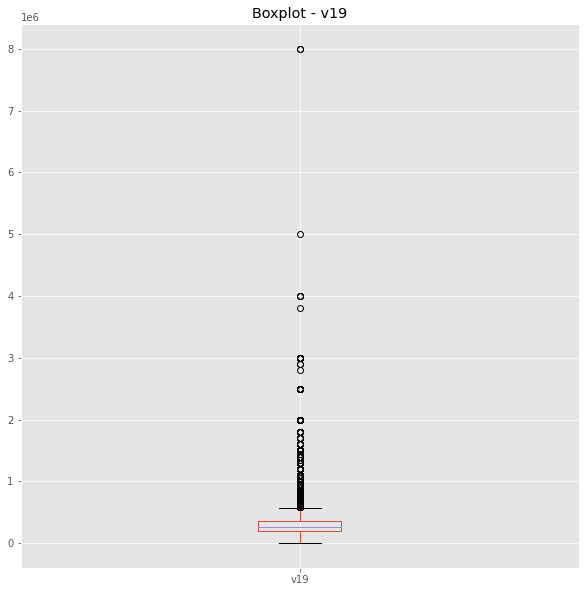

In [ ]:
data['v19'].plot.box()
plt.title("Boxplot - v19")
plt.ylabel('')
plt.xlabel('')
# varios de los circulos se podrian classificar como outliers. 

**v20 - De donde proviene el agua de la vivienda**

In [ ]:
data['v20'].value_counts()

# Red Publica proveen agua a 93% de las viviendas

Red pública                         37789
Pozo o noria                         1419
Río, vertiente, lago o estero         484
Camión aljibe                         370
Otra fuente. ¿Cuál? Especifique.      356
Name: v20, dtype: int64

In [ ]:
data['v20'].isna().sum() # no hay valores faltantes

0

**v22 - Cual es el sistema de distribucion del agua en la vivienda?**

In [ ]:
data['v22'].isna().sum() # 2629 valores faltantes

# podriamos borrar estas observaciones? Podriamos remplazarlas con la respuesta mas comun?

# Voy a elegir la segunda opcion de remplazar los valores faltantes con la resupesta mas comun, ya 
# que no quiero borrar 2629 observaciones. 

# al crear el modelo se incluyirá esta variable, y se analizará su coeficiente para ver si es importante en el modelo. 

2629

In [ ]:
data['v22'] = data['v22'].fillna(data['v22'].mode()[0])

In [ ]:
data['v22'].value_counts()

# Con llave dentro de la vivienda es la sistema mas comun. 

Con llave dentro de la vivienda                          39357
Con llave dentro del sitio, pero fuera de la vivienda     1034
No tiene sistema, la acarrea                                25
No sabe                                                      2
Name: v22, dtype: int64

**v23 - La vivienda donde usted viven dispone de sistema de elminacion de excretas?**

In [ ]:
data['v23'].isna().sum() # no hay valores faltantes

0

Sí    39820
No      598
Name: v23, dtype: int64


Text(0.5, 0, 'v23')

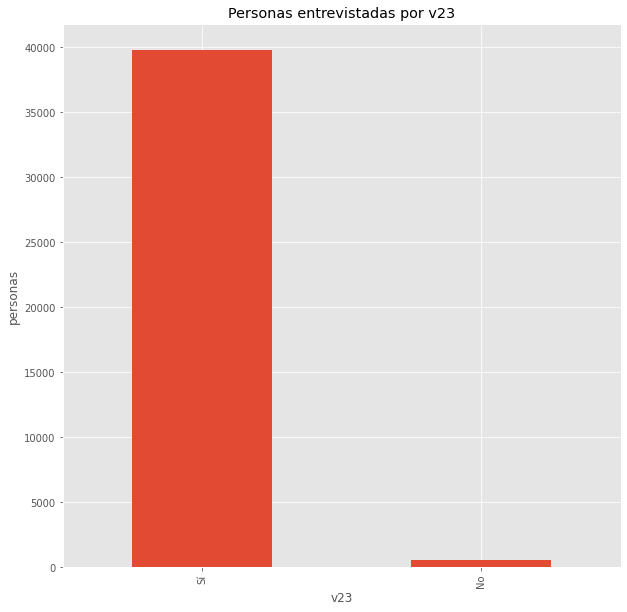

In [ ]:
print(data['v23'].value_counts())

data['v23'].value_counts().plot.bar()
plt.title("Personas entrevistadas por v23")
plt.ylabel('personas')
plt.xlabel('v23')

In [ ]:
data['v23_sistema'].isna().sum()

598

In [ ]:
data['v23_sistema'] = data['v23_sistema'].fillna('No tiene sistema')

W.C. conectado al alcantarillado            35402
W.C. conectado a fosa séptica                3575
Letrina sanitaria conectada a pozo negro      818
No tiene sistema                              598
Cajón                                          22
Baño químico dentro del sitio                   3
Name: v23_sistema, dtype: int64


Text(0.5, 0, 'v23 sistema')

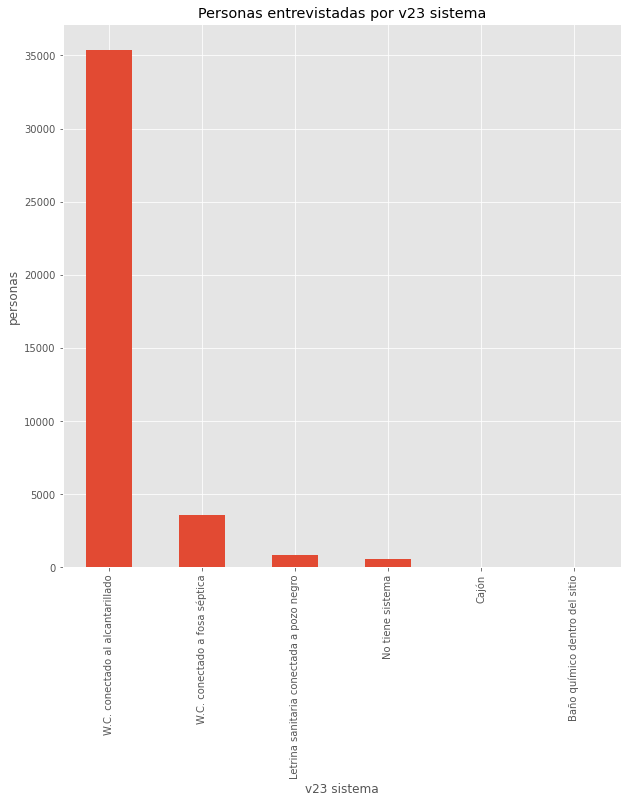

In [ ]:
print(data['v23_sistema'].value_counts())

data['v23_sistema'].value_counts().plot.bar()
plt.title("Personas entrevistadas por v23 sistema")
plt.ylabel('personas')
plt.xlabel('v23 sistema')

# 88% tiene un W.C. conectado al alcantarillado. 
# 1% no tiene sistema 

**v27 - Cuantos dormitorios de uso exclusivo para dormir tiene la vivienda?**

In [ ]:
data['v27'].isna().sum()

0

In [ ]:
data['v27'].value_counts()

3          16841
2          12626
4           5935
1           2504
5           1629
6            494
7            156
8             68
0             64
No sabe       32
9             30
10            13
12            10
11             4
13             3
15             3
20             2
14             2
30             1
16             1
Name: v27, dtype: int64

In [ ]:
data['v27'] = np.where(data['v27'].isin(['6','7','8','9','10','11','12','13','14', '15','16','20','30']), '6+', data['v27'])

3          16841
2          12626
4           5935
1           2504
5           1629
6+           787
0             64
No sabe       32
Name: v27, dtype: int64


Text(0.5, 0, 'v27')

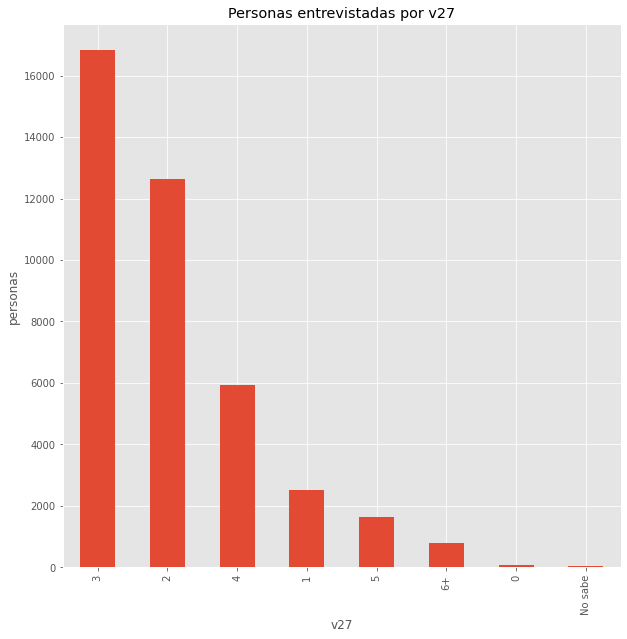

In [ ]:
print(data['v27'].value_counts())

data['v27'].value_counts().plot.bar()
plt.title("Personas entrevistadas por v27")
plt.ylabel('personas')
plt.xlabel('v27')

# viviendas con 2 y 3 dormitorios son mas comunes. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40418 entries, 3 to 185422
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   40418 non-null  int64 
 1   y1           40418 non-null  int64 
 2   region       40418 non-null  object
 3   comuna       40418 non-null  object
 4   zona         40418 non-null  object
 5   area         40418 non-null  object
 6   edad         40418 non-null  int64 
 7   sexo         40418 non-null  object
 8   v1           40418 non-null  object
 9   v13          40418 non-null  object
 10  v19_preg     40418 non-null  object
 11  v19          40418 non-null  int64 
 12  v20          40418 non-null  object
 13  v20_esp      356 non-null    object
 14  v22          40418 non-null  object
 15  v23          40418 non-null  object
 16  v23_sistema  40418 non-null  object
 17  v27          40418 non-null  object
 18  v29          1167 non-null   object
dtypes: int64(4), object(15)


In [ ]:
# Drop columnas que no se necesitan

data.drop(['Unnamed: 0', 'zona' , 'comuna', 'v19_preg', 'v20_esp', 'v23', 'v29'], axis = 1, inplace = True)

# unnamed es una copia del indice
# Area es mejor que zona 
# comuna solo se usó para computar las valores faltantes de v19. Se va a borrar ya que provee demasiado detalle, 
# y al hacer one hot enocoding con esta variable, el tamano y peso de la base de datos se va a aumentar mucho. 
# v19 da mas informacion que v19_preg
# v20 da mas informacion que v20_esp
# v23_sistema da mas informacion que v23 
# v29 tiene un alto procentaje de valores faltantes (97%)

## One hot encoding

In [ ]:
# One hot encoding de variables categoricos

In [ ]:
catCols = [col for col in data.columns if data[col].dtype=="O"]
catCols

['region', 'area', 'sexo', 'v1', 'v13', 'v20', 'v22', 'v23_sistema', 'v27']

In [ ]:
dumies_ = pd.get_dummies(data[catCols], drop_first=True) # 'drop first = True' - para eliminar la primera feature elegida y evitar la multicolinealidad 

In [ ]:
data_final = pd.concat([data, dumies_], axis = 1)

In [ ]:
data_final.drop(['region',
 'area',
 'sexo',
 'v1',
 'v13',
 'v20',
 'v22',
 'v23_sistema',
 'v27'], axis = 1, inplace = True)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40418 entries, 3 to 185422
Data columns (total 51 columns):
 #   Column                                                                              Non-Null Count  Dtype
---  ------                                                                              --------------  -----
 0   y1                                                                                  40418 non-null  int64
 1   edad                                                                                40418 non-null  int64
 2   v19                                                                                 40418 non-null  int64
 3   region_Región de Antofagasta                                                        40418 non-null  uint8
 4   region_Región de Arica y Parinacota                                                 40418 non-null  uint8
 5   region_Región de Atacama                                                            40418 non-null  uint8
 6

## Multicolinearidad

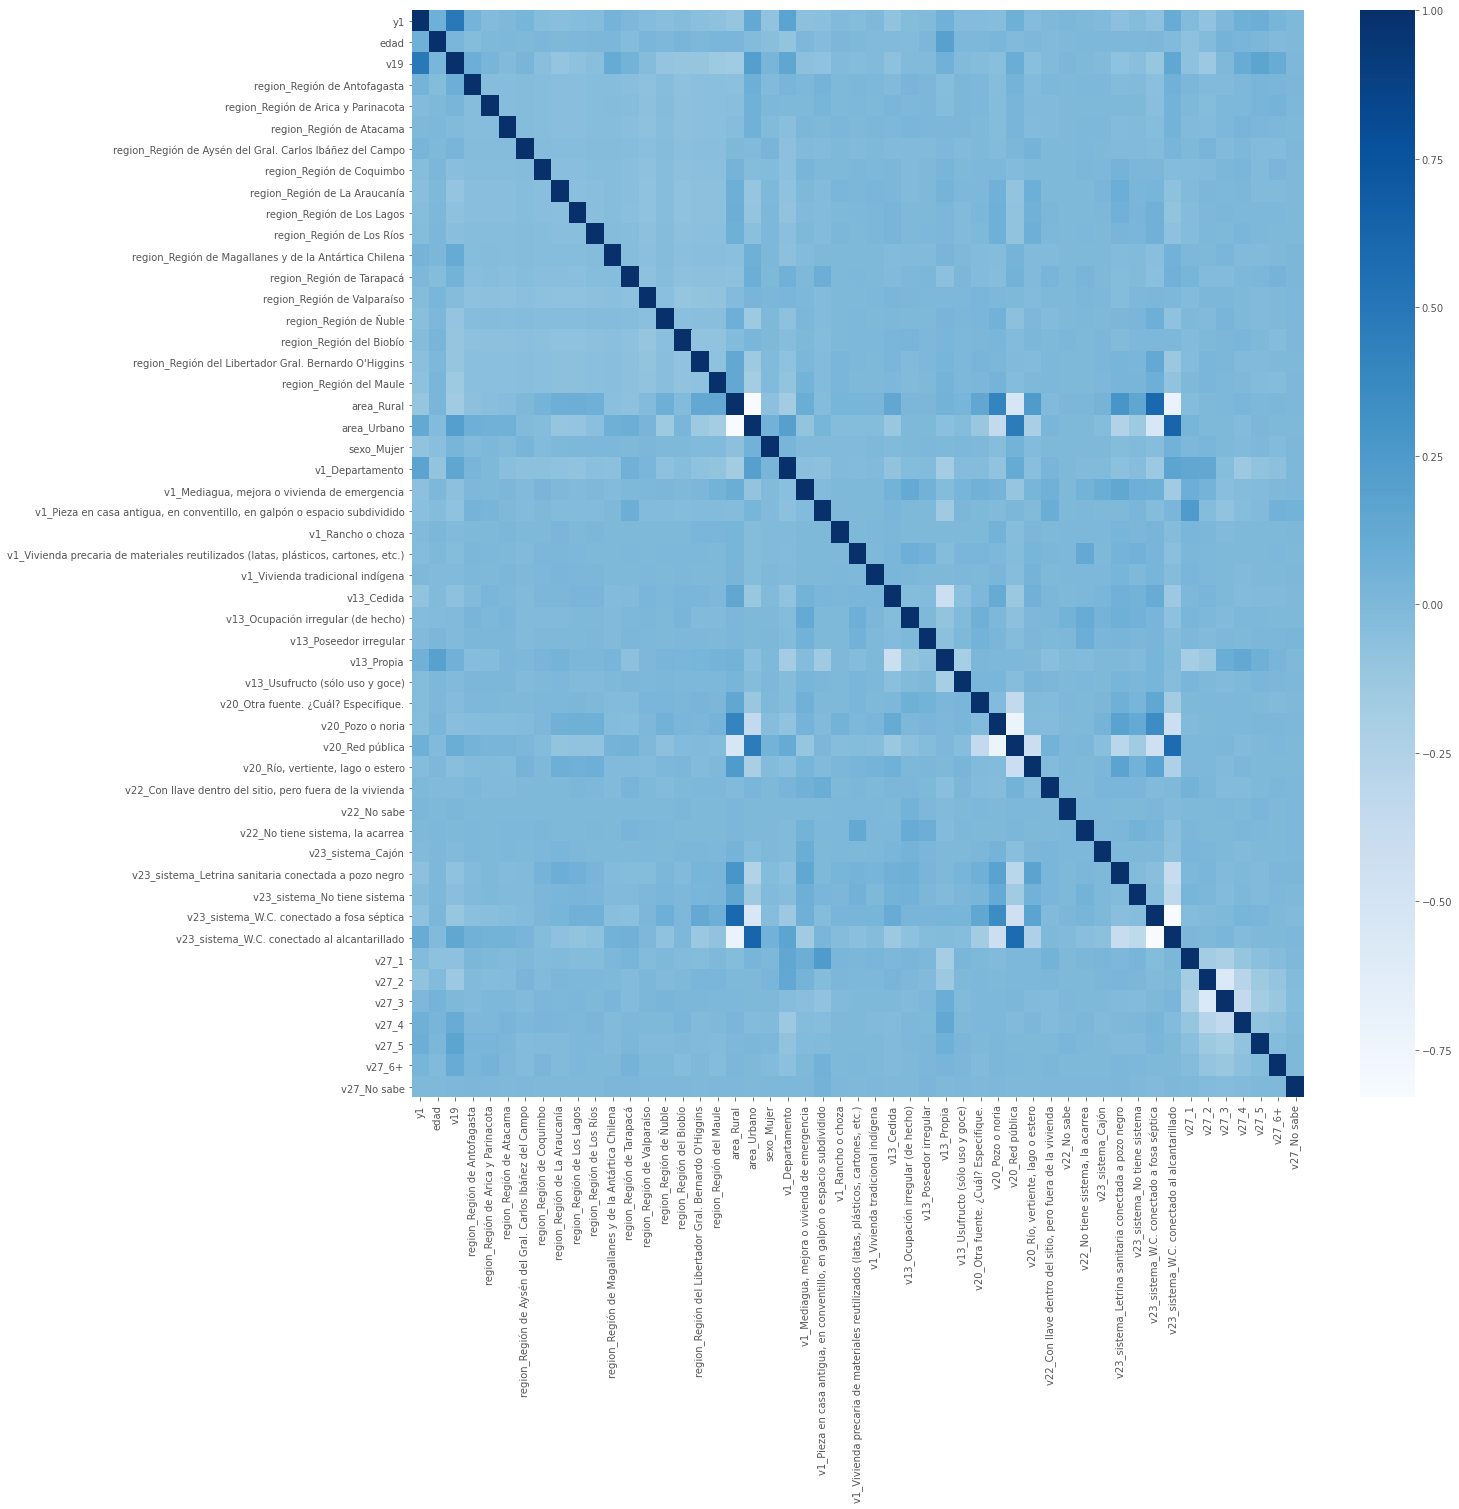

In [ ]:
# # correlacion 

corr = data_final.corr()

# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=False)

In [ ]:
# se nota que v19 (precio para arrendar en el sector) es la variable que correla mas con la variable dependiente y1 (sueldo)

In [ ]:
# Filtrar la matriz de correlacion para ver cual variables tiene una correlacion positiva y negativa. 

# esta informacion de una alta correlacion se puede usar mas adelante para determinar cual variables incluir en el modelo

In [ ]:
corr.stack()[(corr.stack() > 0.5) & (corr.stack() != 1)]

area_Rural                                    v23_sistema_W.C. conectado a fosa séptica      1
area_Urbano                                   v23_sistema_W.C. conectado al alcantarillado   1
v20_Red pública                               v23_sistema_W.C. conectado al alcantarillado   1
v23_sistema_W.C. conectado a fosa séptica     area_Rural                                     1
v23_sistema_W.C. conectado al alcantarillado  area_Urbano                                    1
                                              v20_Red pública                                1
dtype: float64

In [ ]:
corr.stack()[(corr.stack() < -0.5) & (corr.stack() != -1)]

area_Rural                                    area_Urbano                                    -1
                                              v20_Red pública                                -1
                                              v23_sistema_W.C. conectado al alcantarillado   -1
area_Urbano                                   area_Rural                                     -1
                                              v23_sistema_W.C. conectado a fosa séptica      -1
v20_Pozo o noria                              v20_Red pública                                -1
v20_Red pública                               area_Rural                                     -1
                                              v20_Pozo o noria                               -1
v23_sistema_W.C. conectado a fosa séptica     area_Urbano                                    -1
                                              v23_sistema_W.C. conectado al alcantarillado   -1
v23_sistema_W.C. conectado al alcantaril

In [ ]:
# variance inflation factor - verificar si hay MC. Un valor VIF mas de 5 sugiere MC con otras variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data_final.drop(['y1'], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  

vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
0,edad,12.457683
1,v19,4.342985
2,region_Región de Antofagasta,1.192026
3,region_Región de Arica y Parinacota,1.169043
4,region_Región de Atacama,1.212062
5,region_Región de Aysén del Gral. Carlos Ibáñez...,1.163770
6,region_Región de Coquimbo,1.235994
7,region_Región de La Araucanía,1.343312
8,region_Región de Los Lagos,1.340139
9,region_Región de Los Ríos,1.234560


In [ ]:
# los siguientes variables tienen un VIF mas grande que 5.0 lo que sugiere que pueden tender MultiColinearidad con otras variables: 

# edad, area_Urbano, v20_Red pública, v23_sistema_Letrina sanitaria conectada a pozo..., v23_sistema_No tiene sistema,  v23_sistema_W.C. conectado a fosa séptica, v23_sistema_W.C. conectado al alcantarillado
# v27_1, v27_2, v27_3, v27_4, v27_5, v27_6+

# # esta informacion de multicolinearidad se puede usar mas adelante para determinar cual variables incluir en el modelo.

## Modelo de Regresión Lineal Múltiple utilizando la librería STATSMODEL de Python.

In [ ]:
# Modelo de Regresión Lineal Múltiple utilizando la librería STATSMODEL de Python.

import statsmodels.api as sm

x = data_final.drop(['y1'], axis = 1)
y = data_final['y1']

# fi model

x = sm.add_constant(x)

est_1 = sm.OLS(y, x).fit()

est_1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     301.5
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:54:11   Log-Likelihood:            -5.9545e+05
No. Observations:               40418   AIC:                         1.191e+06
Df Residuals:                   40367   BIC:                         1.191e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               2.276e+05    3.6e+05      0.632      0.527   -4.78e+05    9.33e+05
edad                                                                                3592.4245    239.954     14.971      0.000    3122.109    4062.740
v19                                                                                    1.6402      0.017     95.427      0.000       1.606       1.674
region_Región de Antofagasta                                                        1003.9874   1.59e+04      0.063      0.950   -3.01e+04    3.21e+04
region_Región de Arica y Parinacota                                                 -7.98e+04   1.74e+04     -4.594      0.000   -1.14e+05   -4.58e+04
region_Región de Atacama                                                             2.19e+04   1.65e+04      1.325      0.185   -1.05e+04    5.43e+04
region_Región de Aysén del Gral. Carlos Ibáñez del Campo                            1.373e+05   1.91e+04      7.184      0.000    9.98e+04    1.75e+05
region_Región de Coquimbo                                                          -1.965e+04   1.67e+04     -1.174      0.240   -5.25e+04    1.31e+04
region_Región de La Araucanía                                                       4.239e+04   1.56e+04      2.726      0.006    1.19e+04    7.29e+04
region_Región de Los Lagos                                                          3.353e+04   1.52e+04      2.211      0.027    3800.029    6.33e+04
region_Región de Los Ríos                                                           3.653e+04   1.72e+04      2.124      0.034    2826.189    7.02e+04
region_Región de Magallanes y de la Antártica Chilena                              -3.201e+04   1.83e+04     -1.750      0.080   -6.79e+04    3845.458
region_Región de Tarapacá                                                          -6.258e+04   1.54e+04     -4.058      0.000   -9.28e+04   -3.24e+04
region_Región de Valparaíso                                                        -1.103e+04   1.19e+04     -0.924      0.356   -3.45e+04    1.24e+04
region_Región de Ñuble                                                              5.236e+04    1.9e+04      2.753      0.006    1.51e+04    8.96e+04
region_Región del Biobío                                                            5.767e+04   1.23e+04      4.694      0.000    3.36e+04    8.18e+04
region_Región del Libertador Gral. Bernardo O'Higgins                               3.245e+04   1.38e+04      2.346      0.019    5343.452    5.96e+04
region_Región del Maule                                        

In [ ]:
# tiene un R2 de 0.272

# las sigientes variables no son significativos (valor p es mas que 0.05)

'region_Región de Antofagasta', "region_Región de Atacama", "region_Región de Coquimbo", "region_Región de Valparaíso", 'area_Rural', 
'area_Urbano', 'v1_Pieza en casa antigua, en conventillo, en galpón o espacio subdividido', 'v1_Rancho o choza', 'v1_Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)',
'v1_Vivienda tradicional indígena', 'v13_Poseedor irregular', 'v13_Propia', 'v20_Otra fuente. ¿Cuál? Especifique.', 'v20_Pozo o noria',
'v20_Red pública', 'v20_Río, vertiente, lago o estero', 'v22_Con llave dentro del sitio, pero fuera de la vivienda', 'v22_No sabe',
'v22_No tiene sistema, la acarrea', 'v23_sistema_Cajón', 'v23_sistema_Letrina sanitaria conectada a pozo negro', 'v23_sistema_No tiene sistema',
'v23_sistema_W.C. conectado a fosa séptica', 'v23_sistema_W.C. conectado al alcantarillado', 'v27_1',
'v27_2', 'v27_3', 'v27_4', 'v27_5', 'v27_6+', 'v27_No sabe'

# probare el modelo de nuevo pero sin estas variables

In [ ]:
no_significativos = ['y1', 'region_Región de Antofagasta', "region_Región de Atacama", "region_Región de Coquimbo", "region_Región de Valparaíso", 'area_Rural', 
'area_Urbano', 'v1_Pieza en casa antigua, en conventillo, en galpón o espacio subdividido', 'v1_Rancho o choza', 'v1_Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)',
'v1_Vivienda tradicional indígena', 'v13_Poseedor irregular', 'v13_Propia', 'v20_Otra fuente. ¿Cuál? Especifique.', 'v20_Pozo o noria',
'v20_Red pública', 'v20_Río, vertiente, lago o estero', 'v22_Con llave dentro del sitio, pero fuera de la vivienda', 'v22_No sabe',
'v22_No tiene sistema, la acarrea', 'v23_sistema_Cajón', 'v23_sistema_Letrina sanitaria conectada a pozo negro', 'v23_sistema_No tiene sistema',
'v23_sistema_W.C. conectado a fosa séptica', 'v23_sistema_W.C. conectado al alcantarillado', 'v27_1',
'v27_2', 'v27_3', 'v27_4', 'v27_5', 'v27_6+', 'v27_No sabe']

x = data_final.drop(no_significativos, axis = 1)
y = data_final['y1']

# fi model

x = sm.add_constant(x)

est_2 = sm.OLS(y, x).fit()

est_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     782.1
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:54:16   Log-Likelihood:            -5.9553e+05
No. Observations:               40418   AIC:                         1.191e+06
Df Residuals:                   40398   BIC:                         1.191e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1.657e+04   1.29e+04      1.282      0.200   -8767.602    4.19e+04
edad                                                      3668.8589    235.650     15.569      0.000    3206.979    4130.739
v19                                                          1.6870      0.016    105.086      0.000       1.656       1.719
region_Región de Arica y Parinacota                      -7.525e+04   1.67e+04     -4.497      0.000   -1.08e+05   -4.25e+04
region_Región de Aysén del Gral. Carlos Ibáñez del Campo  1.324e+05   1.84e+04      7.187      0.000    9.63e+04    1.68e+05
region_Región de La Araucanía                             3.785e+04   1.44e+04      2.623      0.009    9571.431    6.61e+04
region_Región de Los Lagos                                2.844e+04   1.41e+04      2.019      0.044     828.554    5.61e+04
region_Región de Los Ríos                                 3.326e+04   1.63e+04      2.042      0.041    1334.265    6.52e+04
region_Región de Magallanes y de la Antártica Chilena    -3.644e+04   1.77e+04     -2.058      0.040   -7.11e+04   -1731.853
region_Región de Tarapacá                                -6.063e+04   1.48e+04     -4.109      0.000   -8.96e+04   -3.17e+04
region_Región de Ñuble                                    5.291e+04   1.79e+04      2.953      0.003    1.78e+04     8.8e+04
region_Región del Biobío                                  6.301e+04   1.12e+04      5.641      0.000    4.11e+04    8.49e+04
region_Región del Libertador Gral. Bernardo O'Higgins     2.742e+04   1.26e+04      2.185      0.029    2818.556     5.2e+04
region_Región del Maule                                   3.565e+04   1.28e+04      2.778      0.005    1.05e+04    6.08e+04
sexo_Mujer                                               -1.383e+05   6060.059    -22.826      0.000    -1.5e+05   -1.26e+05
v1_Departamento                                           2.183e+05   8712.539     25.051      0.000    2.01e+05    2.35e+05
v1_Mediagua, mejora o vivienda de emergencia              -1.21e+05   2.46e+04     -4.928      0.000   -1.69e+05   -7.29e+04
v13_Cedida                                               -9.843e+04   9738.067    -10.107      0.000   -1.18e+05   -7.93e+04
v13_Ocupación irregular (de hecho)                       -1.486e+05   4.11e+04     -3.617      0.000   -2.29e+05   -6.81e+04
v13_Usufructo (sólo uso y goce)                          -1.215e+05   1.99e+04     -6.112      0.000   -1.61e+05   -8.26e+04
==============================================================================
Omnibus:                    40508.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Ber

In [ ]:
# Ahora el valor de R2 se mantiene con 0.269, y todas las variables son significativas. 

# const es $16.572 lo que representa el sueldo (variable dependiente) sin tomar en cuenta ninguna de las variables independientes. 

# Al analizar los coeficientes se nota que las siguientes variables causan un aumento en sueldo:

# edad 
# v19
# Aysén
# La Araucanía
# Los Lagos  
# Los Ríos
# Ñuble
# Biobío
# Libertador Gral. Bernardo O'Higgins
# Maule
# v1_Departamento 

# Segun el modelo si alguien vive en Aysen su sueldo aumenta $132.362 

# Si alguien vive en un departamento su sueldo aumenta $218.257

# Por el otro lado si alguien es mujer su sueldo baja $138.329

print(est_2.params)


const                                                        16572.239767
edad                                                          3668.858892
v19                                                              1.687036
region_Región de Arica y Parinacota                         -75250.227536
region_Región de Aysén del Gral. Carlos Ibáñez del Campo    132362.003062
region_Región de La Araucanía                                37847.431618
region_Región de Los Lagos                                   28441.714119
region_Región de Los Ríos                                    33264.109000
region_Región de Magallanes y de la Antártica Chilena       -36435.728786
region_Región de Tarapacá                                   -60631.359062
region_Región de Ñuble                                       52913.636316
region_Región del Biobío                                     63009.258671
region_Región del Libertador Gral. Bernardo O'Higgins        27424.955482
region_Región del Maule               

In [ ]:
# sin embargo, al haber visto anteriormente que varias variables tienen un VIF mayor que 5, se sugiere que hay multicolineardiad que puede impactar
# el modelo con los coeficientes susceptibles a cambiar al remover y agregar variables al modelo. 

# por tanto ahora se ejecutar el modelo de nuevo pero sin las variables que tienen un VIF mayor de 5.

# En este caso la variable de edad es la unica que queda en el modelo con un VIF mayor de 5. 


In [ ]:
vif_data[vif_data['VIF'] > 5]


,feature,VIF
0,edad,12.457683
18,area_Urbano,19.709101
33,v20_Red pública,115.159352
39,v23_sistema_Letrina sanitaria conectada a pozo...,16.308617
40,v23_sistema_No tiene sistema,12.266108
41,v23_sistema_W.C. conectado a fosa séptica,69.061995
42,v23_sistema_W.C. conectado al alcantarillado,680.750202
43,v27_1,39.009590
44,v27_2,195.101820
45,v27_3,260.480414


In [ ]:
# se ejecuta el modelo de nuevo pero sin la variable independiente de edad. 

no_significativos_VIF = ['y1', 'edad', 'region_Región de Antofagasta', "region_Región de Atacama", "region_Región de Coquimbo", "region_Región de Valparaíso", 'area_Rural', 
'area_Urbano', 'v1_Pieza en casa antigua, en conventillo, en galpón o espacio subdividido', 'v1_Rancho o choza', 'v1_Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)',
'v1_Vivienda tradicional indígena', 'v13_Poseedor irregular', 'v13_Propia', 'v20_Otra fuente. ¿Cuál? Especifique.', 'v20_Pozo o noria',
'v20_Red pública', 'v20_Río, vertiente, lago o estero', 'v22_Con llave dentro del sitio, pero fuera de la vivienda', 'v22_No sabe',
'v22_No tiene sistema, la acarrea', 'v23_sistema_Cajón', 'v23_sistema_Letrina sanitaria conectada a pozo negro', 'v23_sistema_No tiene sistema',
'v23_sistema_W.C. conectado a fosa séptica', 'v23_sistema_W.C. conectado al alcantarillado', 'v27_1',
'v27_2', 'v27_3', 'v27_4', 'v27_5', 'v27_6+', 'v27_No sabe']

x = data_final.drop(no_significativos_VIF, axis = 1)
y = data_final['y1']

# fi model

x = sm.add_constant(x)

est_3 = sm.OLS(y, x).fit()

est_3.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     807.2
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:54:33   Log-Likelihood:            -5.9565e+05
No. Observations:               40418   AIC:                         1.191e+06
Df Residuals:                   40399   BIC:                         1.192e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1.736e+05   8111.222     21.404      0.000    1.58e+05     1.9e+05
v19                                                          1.6953      0.016    105.344      0.000       1.664       1.727
region_Región de Arica y Parinacota                      -7.654e+04   1.68e+04     -4.561      0.000   -1.09e+05   -4.37e+04
region_Región de Aysén del Gral. Carlos Ibáñez del Campo  1.303e+05   1.85e+04      7.056      0.000    9.41e+04    1.67e+05
region_Región de La Araucanía                             3.568e+04   1.45e+04      2.466      0.014    7318.668     6.4e+04
region_Región de Los Lagos                                2.834e+04   1.41e+04      2.006      0.045     643.040     5.6e+04
region_Región de Los Ríos                                 3.564e+04   1.63e+04      2.181      0.029    3617.658    6.77e+04
region_Región de Magallanes y de la Antártica Chilena    -3.677e+04   1.78e+04     -2.071      0.038   -7.16e+04   -1962.056
region_Región de Tarapacá                                 -6.54e+04   1.48e+04     -4.420      0.000   -9.44e+04   -3.64e+04
region_Región de Ñuble                                    5.339e+04    1.8e+04      2.971      0.003    1.82e+04    8.86e+04
region_Región del Biobío                                  6.705e+04   1.12e+04      5.986      0.000    4.51e+04     8.9e+04
region_Región del Libertador Gral. Bernardo O'Higgins     2.804e+04   1.26e+04      2.227      0.026    3357.974    5.27e+04
region_Región del Maule                                   3.837e+04   1.29e+04      2.982      0.003    1.31e+04    6.36e+04
sexo_Mujer                                               -1.427e+05   6071.675    -23.499      0.000   -1.55e+05   -1.31e+05
v1_Departamento                                           2.064e+05   8705.024     23.709      0.000    1.89e+05    2.23e+05
v1_Mediagua, mejora o vivienda de emergencia             -1.206e+05   2.46e+04     -4.897      0.000   -1.69e+05   -7.23e+04
v13_Cedida                                                -1.01e+05   9765.740    -10.339      0.000    -1.2e+05   -8.18e+04
v13_Ocupación irregular (de hecho)                       -1.613e+05   4.12e+04     -3.916      0.000   -2.42e+05   -8.06e+04
v13_Usufructo (sólo uso y goce)                          -1.214e+05   1.99e+04     -6.086      0.000    -1.6e+05   -8.23e+04
==============================================================================
Omnibus:                    40546.274   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13360865.768
Skew:                           4.317   Prob(JB):                         0.00
Kurtosis:        

In [ ]:
# Al comparar los coeficientes en los modelos est_2 y est_3 parece que incluir la variable edad con su multicolinearidad 
# no impacta mucho los coeficientes con valores muy parecidos para las variables en ambos modelos. Por tanto se usara el modelo est_2 como 
# modelo final ya que su R2 es un poco mas alto. 

## Modelo de Regresión Lineal Múltiple utilizando la librería Scikit-learn de Python (con las mismas variables anteriormente utilizadas)

Modelo de Regresión Lineal Múltiple utilizando la librería Scikit-learn de Python (con las mismas variables anteriormente utilizadas)

*   Dividir la base de datos en “Entrenamiento” y “Test”
*   Comparar 30 predicciones con su valor real y mostrarlos en una tabla
*   Interpretar el modelo de Regresión Lineal con sus respectivos coeficientes

In [ ]:
data_final

,y1,edad,v19,region_Región de Antofagasta,region_Región de Arica y Parinacota,region_Región de Atacama,region_Región de Aysén del Gral. Carlos Ibáñez del Campo,region_Región de Coquimbo,region_Región de La Araucanía,region_Región de Los Lagos,region_Región de Los Ríos,region_Región de Magallanes y de la Antártica Chilena,region_Región de Tarapacá,region_Región de Valparaíso,region_Región de Ñuble,region_Región del Biobío,region_Región del Libertador Gral. Bernardo O'Higgins,region_Región del Maule,area_Rural,area_Urbano,sexo_Mujer,v1_Departamento,"v1_Mediagua, mejora o vivienda de emergencia","v1_Pieza en casa antigua, en conventillo, en galpón o espacio subdividido",v1_Rancho o choza,"v1_Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)",v1_Vivienda tradicional indígena,v13_Cedida,v13_Ocupación irregular (de hecho),v13_Poseedor irregular,v13_Propia,v13_Usufructo (sólo uso y goce),v20_Otra fuente. ¿Cuál? Especifique.,v20_Pozo o noria,v20_Red pública,"v20_Río, vertiente, lago o estero","v22_Con llave dentro del sitio, pero fuera de la vivienda",v22_No sabe,"v22_No tiene sistema, la acarrea",v23_sistema_Cajón,v23_sistema_Letrina sanitaria conectada a pozo negro,v23_sistema_No tiene sistema,v23_sistema_W.C. conectado a fosa séptica,v23_sistema_W.C. conectado al alcantarillado,v27_1,v27_2,v27_3,v27_4,v27_5,v27_6+,v27_No sabe
3,372000,45,210000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5,3000000,57,383192,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
11,320000,54,400000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
13,460000,57,400000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
15,240000,31,383192,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185361,420000,32,150000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
185380,750000,42,172307,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
185385,350000,42,150000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
185397,250000,66,200000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

no_significativos = ['y1', 'region_Región de Antofagasta', "region_Región de Atacama", "region_Región de Coquimbo", "region_Región de Valparaíso", 'area_Rural', 
'area_Urbano', 'v1_Pieza en casa antigua, en conventillo, en galpón o espacio subdividido', 'v1_Rancho o choza', 'v1_Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)',
'v1_Vivienda tradicional indígena', 'v13_Poseedor irregular', 'v13_Propia', 'v20_Otra fuente. ¿Cuál? Especifique.', 'v20_Pozo o noria',
'v20_Red pública', 'v20_Río, vertiente, lago o estero', 'v22_Con llave dentro del sitio, pero fuera de la vivienda', 'v22_No sabe',
'v22_No tiene sistema, la acarrea', 'v23_sistema_Cajón', 'v23_sistema_Letrina sanitaria conectada a pozo negro', 'v23_sistema_No tiene sistema',
'v23_sistema_W.C. conectado a fosa séptica', 'v23_sistema_W.C. conectado al alcantarillado', 'v27_1',
'v27_2', 'v27_3', 'v27_4', 'v27_5', 'v27_6+', 'v27_No sabe']

X = data_final.drop(no_significativos, axis = 1)
y = data_final['y1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_test

24916      350000
104660     450000
152322     350000
97280      500000
133321     500000
           ...   
169401     860000
120135     720000
139081    2107000
115149     700000
57718      240000
Name: y1, Length: 13338, dtype: int64

In [ ]:
X_test

,edad,v19,region_Región de Arica y Parinacota,region_Región de Aysén del Gral. Carlos Ibáñez del Campo,region_Región de La Araucanía,region_Región de Los Lagos,region_Región de Los Ríos,region_Región de Magallanes y de la Antártica Chilena,region_Región de Tarapacá,region_Región de Ñuble,region_Región del Biobío,region_Región del Libertador Gral. Bernardo O'Higgins,region_Región del Maule,sexo_Mujer,v1_Departamento,"v1_Mediagua, mejora o vivienda de emergencia",v13_Cedida,v13_Ocupación irregular (de hecho),v13_Usufructo (sólo uso y goce)
24916,28,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104660,56,350000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
152322,31,264565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97280,40,300000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
133321,43,300000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169401,60,300000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
120135,53,380000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139081,31,800000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
115149,29,450000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_hat = reg.predict(X_test)

In [ ]:
y_hat

array([ 535401.98094592,  716939.84436761,  572622.01905052, ...,
       1450313.43678099,  916023.26522733,  472135.52440012])

In [ ]:
pd.DataFrame(y_hat, columns=['y_hat'])

,y_hat
0,5.354020e+05
1,7.169398e+05
2,5.726220e+05
3,6.285119e+05
4,7.343785e+05
...,...
13333,7.619654e+05
13334,8.167310e+05
13335,1.450313e+06
13336,9.160233e+05


In [ ]:
y_hat_DF = pd.DataFrame(y_hat, columns=['y_hat']).reset_index()
y_hat_DF = y_hat_DF.drop('index', axis = 1)
y_hat_DF.shape

(13338, 1)

In [ ]:
y_test_DF = pd.DataFrame(y_test).reset_index()
y_test_DF = y_test_DF.drop('index', axis = 1)
y_test_DF.shape

(13338, 1)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
frames = [y_test_DF, y_hat_DF]

results = pd.concat([y_test_DF.reset_index(drop=True), y_hat_DF], axis=1)

results['diferencia'] = results['y1'] - results['y_hat'] 

print(results.head(30))

print(results.head(30).describe())

         y1   y_hat  diferencia
0    350000  535402     -185402
1    450000  716940     -266940
2    350000  572622     -222622
3    500000  628512     -128512
4    500000  734379     -234379
5    320000  519533     -199533
6    170000  832119     -662119
7   4000000 2621301     1378699
8    500000  905017     -405017
9   1800000 1969891     -169891
10   320000  717907     -397907
11   700000  809130     -109130
12   320000  688309     -368309
13   150000  483884     -333884
14   400000  659371     -259371
15   700000  513307      186693
16   350000  645635     -295635
17  1600000  904194      695806
18   500000  426546       73454
19   350000  320472       29528
20   320000   41715      278285
21   120000  292830     -172830
22   350000  478315     -128315
23    60000  336900     -276900
24   340000  613120     -273120
25   400000  421077      -21077
26   320000  309772       10228
27   425000  550850     -125850
28   325000  455854     -130854
29   690000  406154      283846
        

In [ ]:
# Para los primeros 30 observaciones: 

# en los valores reales (y1) habia un sueldo promedio de $589.333
# en los valores predichos (y_hat) el promedio era $670.369
# Normalmente el modelo sobrepredijo el sueldo. 
# En promedio y1 era -$81.035 menor que y_hat

In [ ]:
reg.coef_

array([ 3.16168984e+03,  1.90422029e+00, -6.23782237e+04,  1.38510311e+05,
        6.08298386e+04,  4.44832935e+04,  3.01783213e+04, -4.52618390e+04,
       -6.50933401e+04,  7.94612847e+04,  8.62449167e+04,  5.09146972e+04,
        6.43796654e+04, -1.41894775e+05,  1.98234953e+05, -1.04897467e+05,
       -1.00871182e+05, -1.56987553e+05, -1.19419366e+05])

In [ ]:
pd.DataFrame(zip(X_train.columns, reg.coef_), columns=['variable', 'coeficiente'])

,variable,coeficiente
0,edad,3162
1,v19,2
2,region_Región de Arica y Parinacota,-62378
3,region_Región de Aysén del Gral. Carlos Ibáñez...,138510
4,region_Región de La Araucanía,60830
5,region_Región de Los Lagos,44483
6,region_Región de Los Ríos,30178
7,region_Región de Magallanes y de la Antártica ...,-45262
8,region_Región de Tarapacá,-65093
9,region_Región de Ñuble,79461


In [ ]:
# Como para el modelo est_2 las siguientes variables causan un aumento en el sueldo:

# edad, 
# v19, 
# Aysen, 
#Araucania, 
#Los Lagos, 
#Los Rios, 
#Nuble, 
#BioBio, 
#Libertador Gral. Bernardo O'Higgins, 
#Maule,  
#v1_Departamento, 

# Algunos puntos interesantes:

# vivir en un departamento es la variable que mas implica mayor sueldo con un coeficiente de $198.235

# la region que mas implica un aumento en sueldo es Aysen con un coeficiente de $138.510

# v13_Ocupación irregular (de hecho) es la variable que mas implica una reduccion en sueldo con un coeficiente de $156.988

# sexo_Mujer tambien implica una reduccion en sueldo con un coeficiente de $141.895


Calcular el error de tes - MSE (mean squared error) de ambos modelos creados y comparar cual de los modelos tiene el MSE más bajo.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# modelo con Sklearn

mean_squared_error(y_test, y_hat)

387960927479.4875

In [ ]:
# modelo con statsmodels

est_2.mse_model

287724959017736.3

In [ ]:
# el modelo con Sklearn tienen un MSE mas bajo